In [ ]:
### 1. Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
### 2. Prepare data ###

!scp '/content/gdrive/My Drive/comvis/data1.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/'

Output streaming akan dipotong hingga 5000 baris terakhir.
 extracting: /content/test/images/cardboard396_jpg.rf.fb76c5a28057d42886c70e836a5f8660.jpg  
 extracting: /content/test/images/cardboard63_jpg.rf.e8b066437731ba0197b4e8f530317adc.jpg  
 extracting: /content/test/images/cardboard69_jpg.rf.96a2bd9230ba1716c37862930228599c.jpg  
 extracting: /content/test/images/cardboard70_jpg.rf.6658d17c9c675b230ff683f5b1cf0945.jpg  
 extracting: /content/test/images/cardboard73_jpg.rf.7ae241d5654fca1be25ac162c906938a.jpg  
 extracting: /content/test/images/cardboard76_jpg.rf.78841b2438fb79f249e2a464c8587f24.jpg  
 extracting: /content/test/images/glass122_jpg.rf.986be5d9502e97bae857145c3b5172da.jpg  
 extracting: /content/test/images/glass126_jpg.rf.e126b28c100c96edbca2a0dd4b74be48.jpg  
 extracting: /content/test/images/glass128_jpg.rf.f62b1f31ec68d208517ef0fc3d211502.jpg  
 extracting: /content/test/images/glass133_jpg.rf.98c46a035ee9dbe3ef2e11f55370acf6.jpg  
 extracting: /content/test/image

In [ ]:
### 3. Install packages ###

!git clone https://github.com/ultralytics/ultralytics
!cd yolov11 && pip install .

Cloning into 'ultralytics'...
remote: Enumerating objects: 45621, done.
remote: Counting objects: 100% (611/611), done.
remote: Compressing objects: 100% (367/367), done.
remote: Total 45621 (delta 485), reused 272 (delta 244), pack-reused 45010 (from 3)
Receiving objects: 100% (45621/45621), 38.91 MiB | 29.98 MiB/s, done.
Resolving deltas: 100% (33813/33813), done.
/bin/bash: line 1: cd: yolov11: No such file or directory


In [ ]:
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 37.8 MB/s eta 0:00:00


In [ ]:
### 4. Train model ###

import os

from ultralytics import YOLO


config_path = '/content/data.yaml'

# # Load a model
model = YOLO("yolo11m.pt")  # load pre trained model

# Use the model
model.train(data=config_path, epochs=30, batch=16)  # train the model


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 110MB/s] 


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 43.4MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 174MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 1762 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1762/1762 [00:01<00:00, 1613.25it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 503 images, 0 backgrounds, 0 corrupt: 100%|██████████| 503/503 [00:00<00:00, 812.23it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.81G     0.7506      1.992      1.322          8        640: 100%|██████████| 111/111 [01:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.63it/s]

                   all        503        506      0.374      0.324      0.213      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.83G     0.8815      1.661      1.384          5        640: 100%|██████████| 111/111 [01:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]

                   all        503        506      0.287      0.295      0.144     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.81G     0.8904      1.624      1.378          6        640: 100%|██████████| 111/111 [01:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        503        506        0.4      0.335       0.16     0.0945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.77G     0.8992      1.602      1.386          8        640: 100%|██████████| 111/111 [01:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.01it/s]

                   all        503        506      0.263       0.47      0.341      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.81G     0.8234      1.504      1.335          5        640: 100%|██████████| 111/111 [01:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.12it/s]

                   all        503        506      0.154      0.397      0.181      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.79G     0.7791      1.436       1.31          5        640: 100%|██████████| 111/111 [01:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]

                   all        503        506      0.464      0.536      0.446       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.82G     0.7318      1.411      1.281          5        640: 100%|██████████| 111/111 [01:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.01it/s]

                   all        503        506      0.337      0.622      0.419      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.77G     0.7154      1.347      1.266          5        640: 100%|██████████| 111/111 [01:06<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]

                   all        503        506      0.532      0.586      0.583      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       8.8G     0.6868      1.288      1.244          6        640: 100%|██████████| 111/111 [01:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.92it/s]

                   all        503        506      0.382      0.558      0.424      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.78G     0.6498      1.247      1.224          5        640: 100%|██████████| 111/111 [01:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        503        506      0.665      0.593       0.62       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       8.8G     0.6502      1.233      1.226          6        640: 100%|██████████| 111/111 [01:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.99it/s]

                   all        503        506      0.494      0.683      0.636      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.77G     0.6316      1.223      1.214          7        640: 100%|██████████| 111/111 [01:06<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]

                   all        503        506      0.555      0.722      0.718      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.81G     0.6008      1.175      1.198          5        640: 100%|██████████| 111/111 [01:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.91it/s]

                   all        503        506      0.583      0.647      0.683      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.78G     0.5831      1.163      1.181          8        640: 100%|██████████| 111/111 [01:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        503        506      0.618      0.714      0.712      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.82G     0.5907      1.114      1.182          6        640: 100%|██████████| 111/111 [01:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        503        506       0.56      0.717      0.718      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.77G     0.5684      1.067      1.172          6        640: 100%|██████████| 111/111 [01:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.92it/s]

                   all        503        506      0.586      0.735      0.725       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.81G     0.5591      1.063       1.17          8        640: 100%|██████████| 111/111 [01:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.12it/s]

                   all        503        506      0.699      0.737       0.76      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.77G     0.5491      1.006      1.161          6        640: 100%|██████████| 111/111 [01:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]

                   all        503        506      0.709      0.718      0.788      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       8.8G     0.5344      1.014      1.155          3        640: 100%|██████████| 111/111 [01:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]

                   all        503        506      0.692      0.797      0.806      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.77G     0.5251      1.005      1.148          5        640: 100%|██████████| 111/111 [01:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.92it/s]

                   all        503        506      0.697      0.664      0.759      0.717


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.81G     0.3245     0.8154       1.06          2        640: 100%|██████████| 111/111 [01:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        503        506      0.676      0.748      0.789      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.76G     0.3197     0.7914      1.053          2        640: 100%|██████████| 111/111 [01:03<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.94it/s]

                   all        503        506      0.673      0.823      0.803      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       8.8G     0.3037     0.7166      1.041          2        640: 100%|██████████| 111/111 [01:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.10it/s]

                   all        503        506      0.708       0.74      0.774      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.77G     0.3024     0.7401      1.033          5        640: 100%|██████████| 111/111 [01:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]

                   all        503        506      0.772      0.808      0.842      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       8.8G     0.2681     0.6731     0.9972          2        640: 100%|██████████| 111/111 [01:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.97it/s]

                   all        503        506      0.765      0.791      0.839      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.78G     0.2741     0.6349      1.018          2        640: 100%|██████████| 111/111 [01:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]

                   all        503        506      0.746      0.818      0.849      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.81G     0.2582     0.6075      1.002          2        640: 100%|██████████| 111/111 [01:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]

                   all        503        506      0.786      0.829      0.871      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.76G     0.2299     0.5492     0.9655          2        640: 100%|██████████| 111/111 [01:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]

                   all        503        506      0.799      0.843      0.886      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.81G     0.2198     0.5249     0.9616          2        640: 100%|██████████| 111/111 [01:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.06it/s]

                   all        503        506        0.8      0.869      0.883       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.77G     0.2134     0.5071     0.9573          2        640: 100%|██████████| 111/111 [01:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        503        506        0.8      0.893      0.891       0.87



30 epochs completed in 0.628 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]


                   all        503        506        0.8      0.893      0.891       0.87
                 Metal         74         74      0.814      0.851       0.91      0.903
                 Paper        125        127      0.893      0.918      0.959      0.935
               Plastic        102        102       0.86      0.842       0.92      0.905
          Random Trash         25         26      0.565      0.885      0.679      0.652
             cardboard         82         82      0.918      0.954      0.979       0.97
                 glass         95         95       0.75      0.905      0.898      0.857
Speed: 0.2ms preprocess, 10.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a68e96c1840>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
### 5. Download results ###

from google.colab import files


!zip -r /content/runs.zip /content/runs

files.download('/content/runs.zip')


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 16%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 14%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 44%)
  adding: content/runs/detect/train/results.csv (deflated 59%)
  adding: content/runs/detect/train/events.out.tfevents.1734511071.29fa45a68546.512.0 (deflated 93%)
  adding: content/runs/detect/train/train_batch2220.jpg (deflated 10%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 14%)
  adding: content/runs/detect/train/F1_curve.png (deflated 6%)
  adding: content/runs/detect/train/train_batch2221.jpg (deflated 15%)
  adding: content/runs/detect/train/PR_curve.png (deflated 13%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 7%)
  adding: content/runs/detect/train/P_curve.png (deflated 7%)
  adding: content/r

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
### 2. Prepare data ###

!scp '/content/runs11.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/'

Archive:  /content/data.zip
   creating: /content/content/runs/
   creating: /content/content/runs/detect/
   creating: /content/content/runs/detect/train/
  inflating: /content/content/runs/detect/train/val_batch1_labels.jpg  
  inflating: /content/content/runs/detect/train/val_batch2_labels.jpg  
  inflating: /content/content/runs/detect/train/labels_correlogram.jpg  
  inflating: /content/content/runs/detect/train/results.csv  
  inflating: /content/content/runs/detect/train/events.out.tfevents.1734511071.29fa45a68546.512.0  
  inflating: /content/content/runs/detect/train/train_batch2220.jpg  
  inflating: /content/content/runs/detect/train/val_batch2_pred.jpg  
  inflating: /content/content/runs/detect/train/F1_curve.png  
  inflating: /content/content/runs/detect/train/train_batch2221.jpg  
  inflating: /content/content/runs/detect/train/PR_curve.png  
  inflating: /content/content/runs/detect/train/train_batch1.jpg  
  inflating: /content/content/runs/detect/train/P_curve.png  


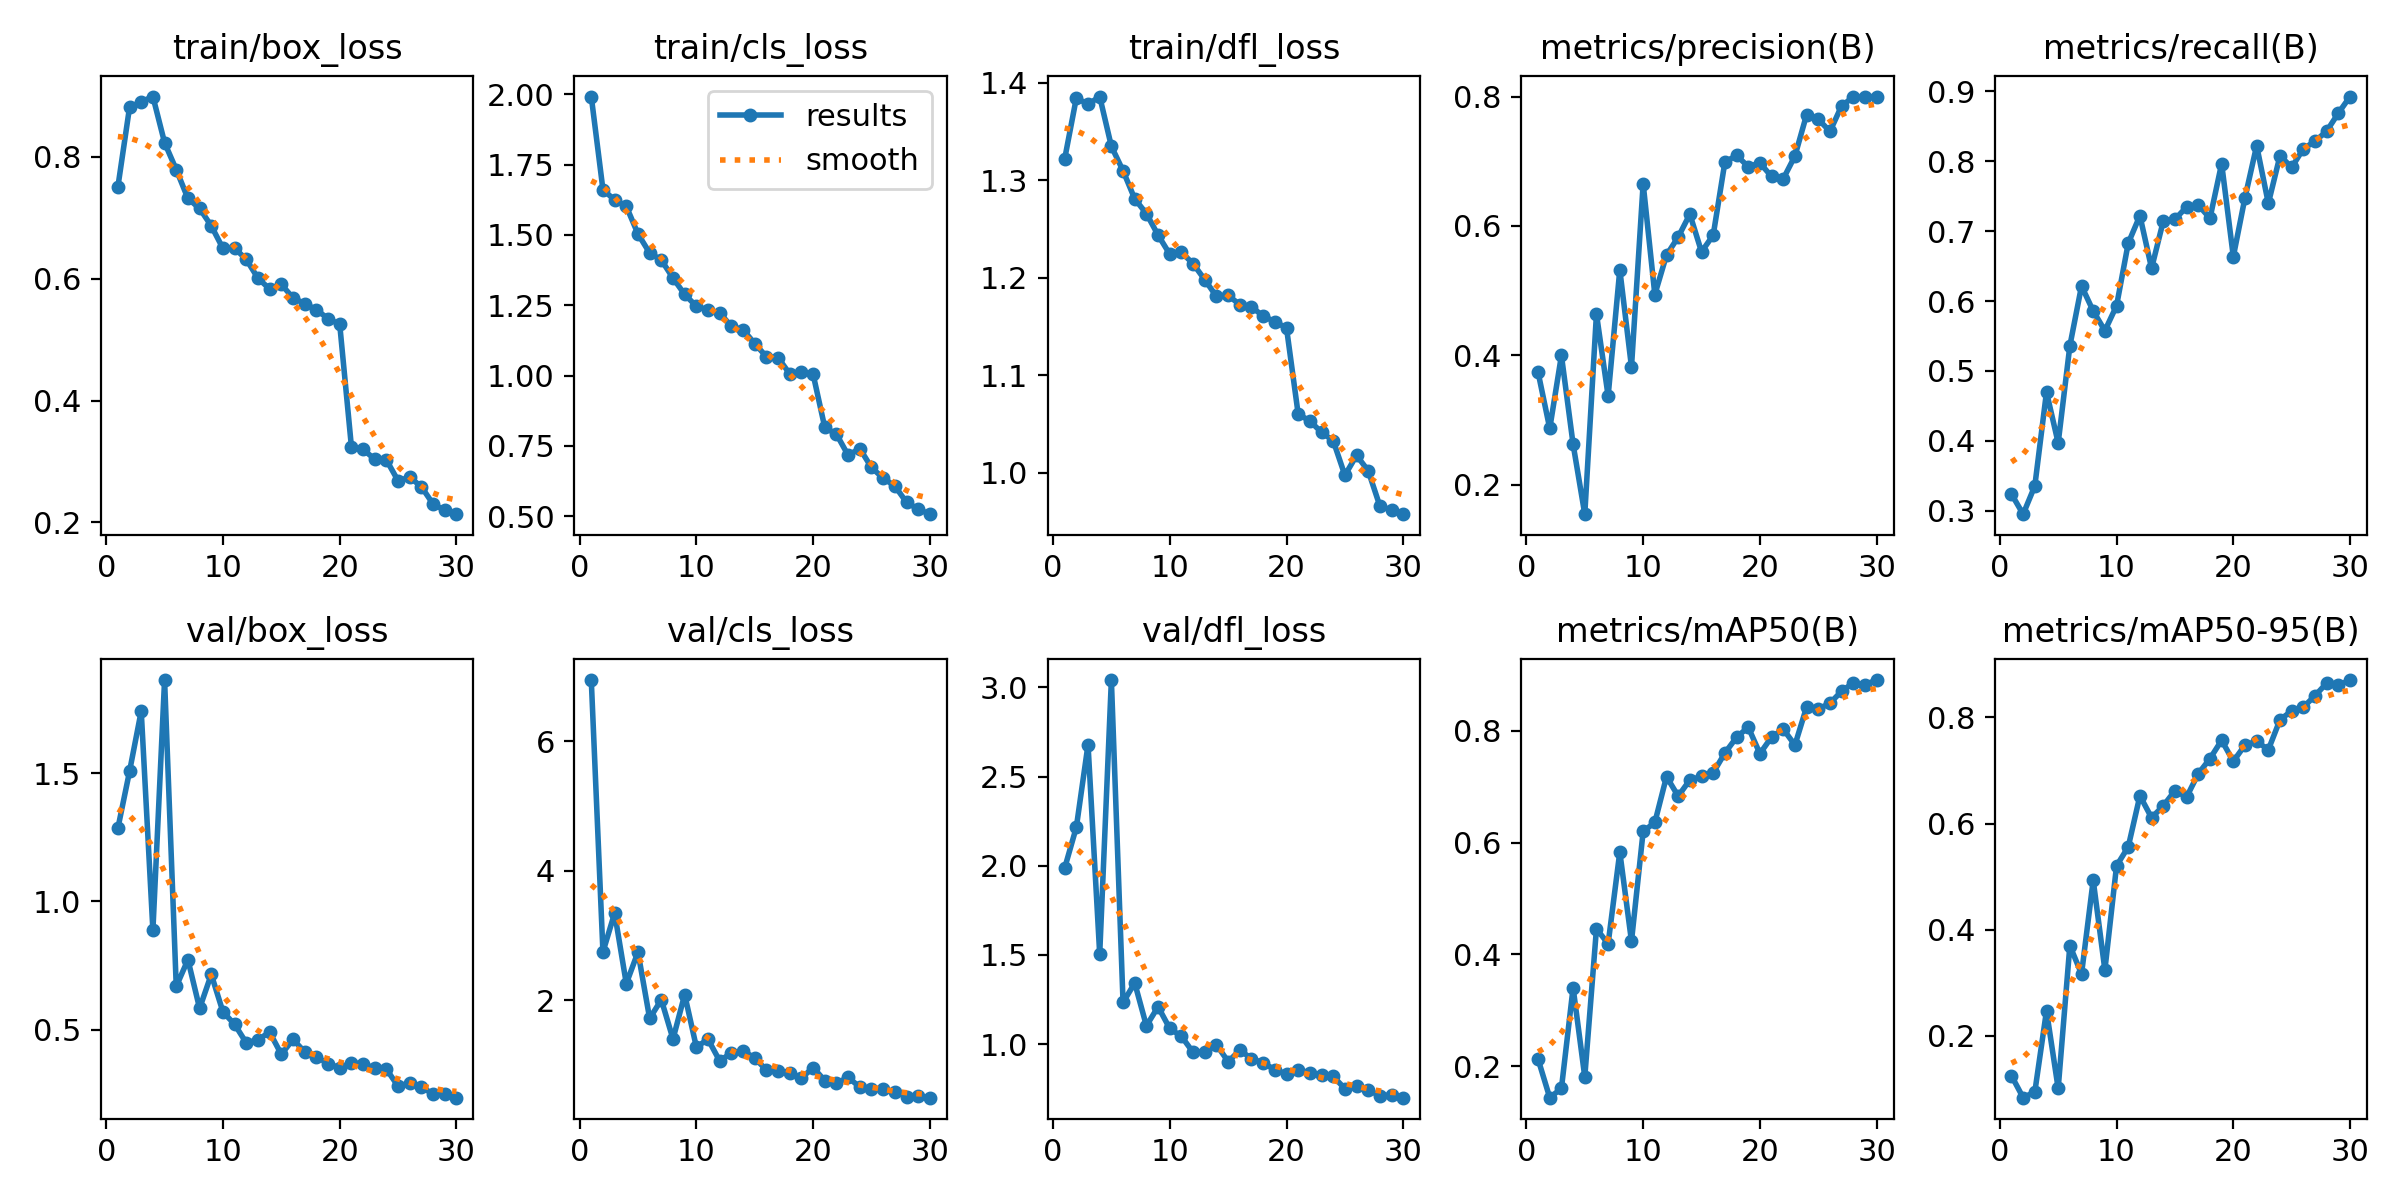

In [11]:
from IPython.display import Image
Image("/content/content/runs/detect/train/results.png")

Testing Gambar

In [13]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 41.0 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/gambartest1.jpg: 640x640 1 glass, 70.0ms
Speed: 9.0ms preprocess, 70.0ms inference, 1507.8ms postprocess per image at shape (1, 3, 640, 640)


array([[[177, 210, 236],
        [177, 210, 236],
        [177, 210, 236],
        ...,
        [104, 129, 149],
        [104, 129, 149],
        [104, 129, 149]],

       [[177, 210, 236],
        [177, 210, 236],
        [177, 210, 236],
        ...,
        [104, 129, 149],
        [104, 129, 149],
        [104, 129, 149]],

       [[177, 210, 236],
        [177, 210, 236],
        [177, 210, 236],
        ...,
        [104, 129, 149],
        [104, 129, 149],
        [104, 129, 149]],

       ...,

       [[188, 214, 238],
        [187, 213, 237],
        [187, 213, 237],
        ...,
        [151, 176, 196],
        [151, 176, 196],
        [151, 176, 196]],

       [[188, 214, 238],
        [188, 214, 238],
        [187, 213, 237],
        ...,
        [151, 176, 196],
        [151, 176, 196],
        [151, 176, 196]],

       [[188, 214, 238],
        [188, 214, 238],
        [188, 214, 238],
        ...,
        [151, 176, 196],
        [151, 176, 196],
        [151, 176, 196]]], dtype=uint8)
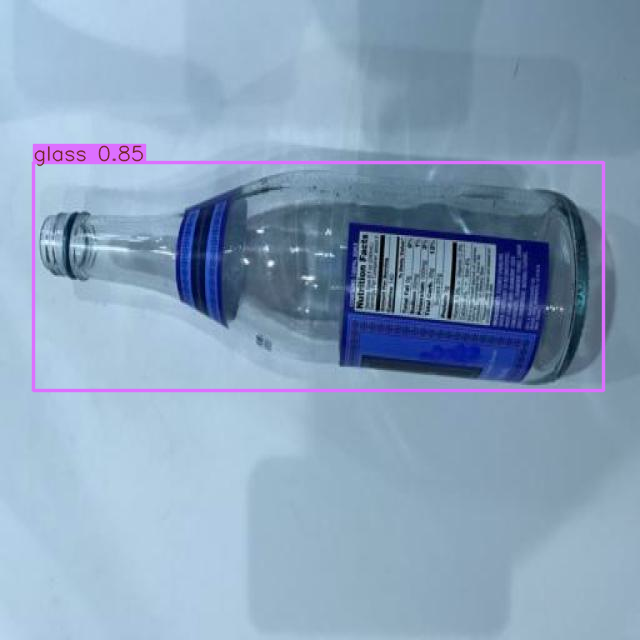

In [14]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest1.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest2.jpg: 640x640 1 Metal, 37.0ms
Speed: 5.0ms preprocess, 37.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


array([[[252, 237, 234],
        [252, 237, 234],
        [252, 237, 234],
        ...,
        [231, 217, 218],
        [231, 217, 218],
        [231, 217, 218]],

       [[252, 237, 234],
        [252, 237, 234],
        [252, 237, 234],
        ...,
        [231, 217, 218],
        [231, 217, 218],
        [231, 217, 218]],

       [[252, 237, 234],
        [252, 237, 234],
        [252, 237, 234],
        ...,
        [231, 217, 218],
        [231, 217, 218],
        [231, 217, 218]],

       ...,

       [[250, 235, 232],
        [250, 235, 232],
        [250, 235, 232],
        ...,
        [213, 200, 198],
        [213, 200, 198],
        [213, 200, 198]],

       [[250, 235, 232],
        [250, 235, 232],
        [250, 235, 232],
        ...,
        [213, 200, 198],
        [213, 200, 198],
        [213, 200, 198]],

       [[250, 235, 232],
        [250, 235, 232],
        [250, 235, 232],
        ...,
        [213, 200, 198],
        [213, 200, 198],
        [213, 200, 198]]], dtype=uint8)
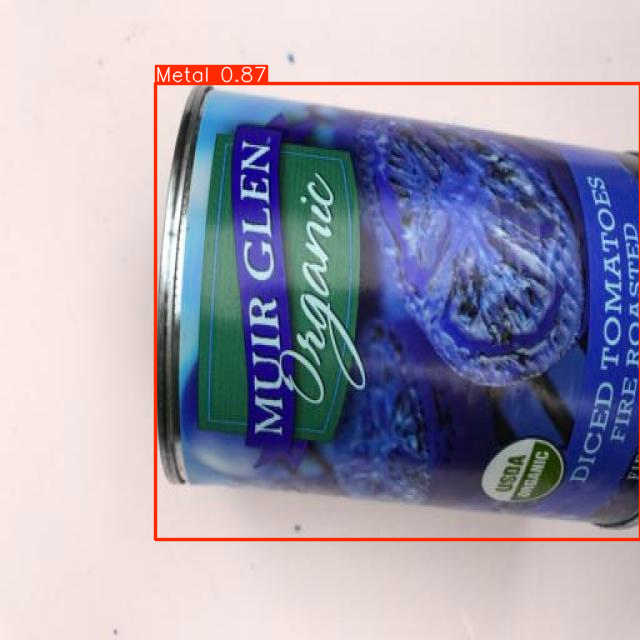

In [15]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest2.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest3.jpg: 640x640 1 Paper, 36.9ms
Speed: 1.8ms preprocess, 36.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


array([[[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]],

       [[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]],

       [[235, 219,  11],
        [235, 219,  11],
        [229, 211,  11],
        ...,
        [226, 216, 137],
        [235, 219,  11],
        [235, 219,  11]],

       ...,

       [[235, 219,  11],
        [235, 219,  11],
        [247, 242, 195],
        ...,
        [203, 196, 153],
        [235, 219,  11],
        [235, 219,  11]],

       [[235, 219,  11],
        [235, 219,  11],
        [245, 237, 157],
        ...,
        [209, 201, 123],
        [235, 219,  11],
        [235, 219,  11]],

       [[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]]], dtype=uint8)
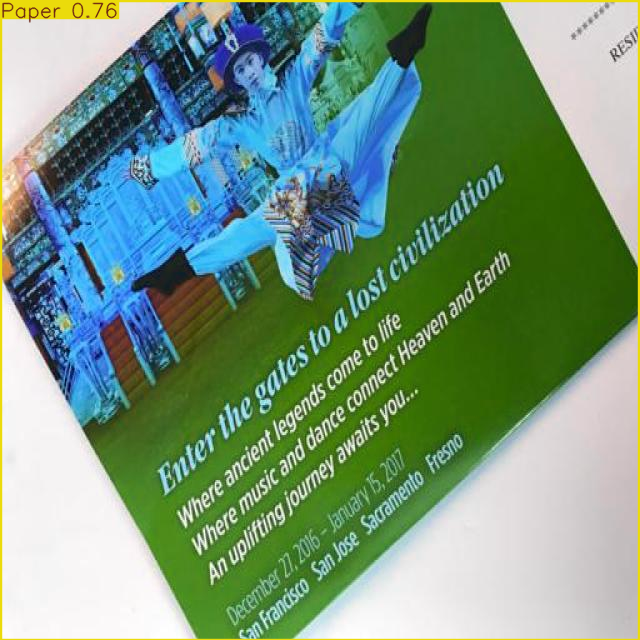

In [16]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest3.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest4.jpg: 640x640 1 Plastic, 36.9ms
Speed: 2.4ms preprocess, 36.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


array([[[233, 219, 220],
        [233, 219, 220],
        [233, 219, 220],
        ...,
        [166, 154, 154],
        [166, 154, 154],
        [166, 154, 154]],

       [[233, 219, 220],
        [233, 219, 220],
        [233, 219, 220],
        ...,
        [166, 154, 154],
        [166, 154, 154],
        [166, 154, 154]],

       [[233, 219, 220],
        [233, 219, 220],
        [233, 219, 220],
        ...,
        [166, 154, 154],
        [166, 154, 154],
        [166, 154, 154]],

       ...,

       [[226, 212, 213],
        [225, 211, 212],
        [225, 211, 212],
        ...,
        [158, 148, 148],
        [158, 148, 148],
        [158, 148, 148]],

       [[226, 212, 213],
        [226, 212, 213],
        [225, 211, 212],
        ...,
        [158, 148, 148],
        [158, 148, 148],
        [158, 148, 148]],

       [[226, 212, 213],
        [226, 212, 213],
        [226, 212, 213],
        ...,
        [158, 148, 148],
        [158, 148, 148],
        [158, 148, 148]]], dtype=uint8)
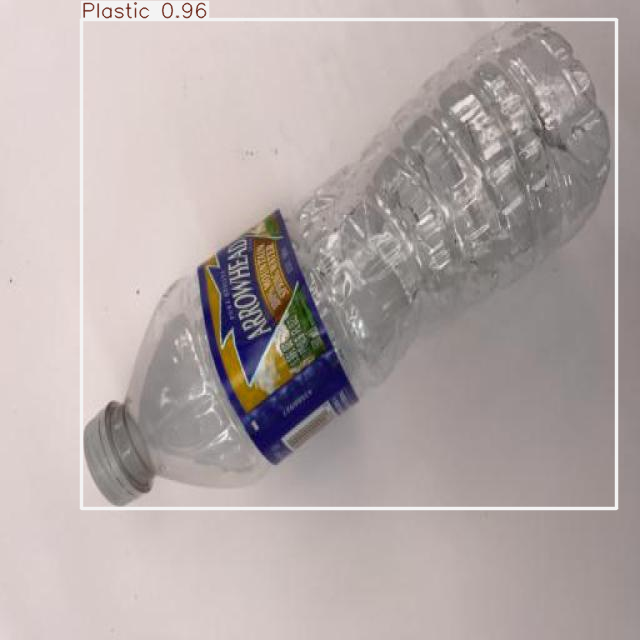

In [17]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest4.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest5.jpg: 640x640 1 cardboard, 36.9ms
Speed: 1.8ms preprocess, 36.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


array([[[233, 228, 229],
        [233, 228, 229],
        [233, 228, 229],
        ...,
        [217, 212, 213],
        [217, 212, 213],
        [217, 212, 213]],

       [[233, 228, 229],
        [233, 228, 229],
        [233, 228, 229],
        ...,
        [217, 212, 213],
        [217, 212, 213],
        [217, 212, 213]],

       [[233, 228, 229],
        [233, 228, 229],
        [233, 228, 229],
        ...,
        [217, 212, 213],
        [217, 212, 213],
        [217, 212, 213]],

       ...,

       [[104,  31,  17],
        [104,  31,  17],
        [ 86,  97, 124],
        ...,
        [213, 208, 209],
        [213, 208, 209],
        [213, 208, 209]],

       [[104,  31,  17],
        [104,  31,  17],
        [ 90,  84, 102],
        ...,
        [212, 207, 208],
        [213, 208, 209],
        [213, 208, 209]],

       [[104,  31,  17],
        [104,  31,  17],
        [104,  31,  17],
        ...,
        [212, 207, 208],
        [213, 208, 209],
        [213, 208, 209]]], dtype=uint8)
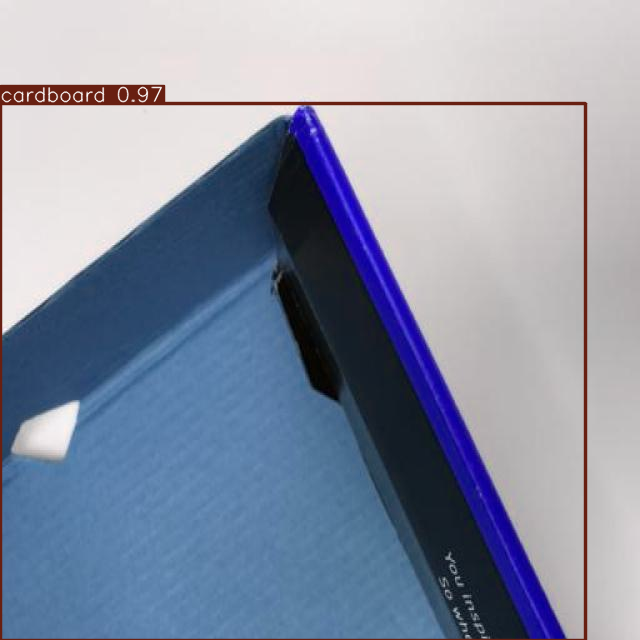

In [21]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest5.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()
